# Garments Project

Project initialization 

In [1]:
# Loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the data
df = pd.read_excel(r"C:\Users\User\Documents\Cleaned Garments sheet.xlsx")

In [3]:
print(df)

    Invoice No        Date  Product Name Category  Size  Quantity  \
0       INV002  2024-01-01  Formal Shirt      Men  Free         2   
1       INV119  2024-01-02  Casual Shirt      Men     S         5   
2       INV020  2024-01-03         Kurti    Women     S         4   
3       INV123  2024-01-04  Kids T-Shirt     Kids     M         1   
4       INV052  2024-01-05  Kids T-Shirt     Kids     S         1   
..         ...         ...           ...      ...   ...       ...   
195     INV075  2024-03-30         Saree    Women  Free         1   
196     INV125  2024-03-30         Jeans      Men    34         3   
197     INV196  2024-03-30      Leggings    Women    32         3   
198     INV086  2024-03-31    Kids Jeans     Kids    34         5   
199     INV173  2024-03-31  Kids T-Shirt     Kids     M         3   

     Unit Price (₹)  Total Amount (₹) Payment Mode  
0               655              1310          UPI  
1              2742             13710          UPI  
2           

In [4]:
df.isnull().count()

Invoice No          200
Date                200
Product Name        200
Category            200
Size                200
Quantity            200
Unit Price (₹)      200
Total Amount (₹)    200
Payment Mode        200
dtype: int64

As we have already cleaned the data using SQL, currently we don't have any missing/irrelevant data

In [6]:
df.describe()

,Quantity,Unit Price (₹),Total Amount (₹)
count,200.000000,200.000000,200.000000
mean,3.025000,1946.000000,5828.330000
std,1.436906,914.356187,4118.687861
min,1.000000,321.000000,345.000000
25%,2.000000,1264.500000,2394.250000
50%,3.000000,1943.000000,4923.500000
75%,4.000000,2682.250000,8428.500000
max,5.000000,3488.000000,17380.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Invoice No        200 non-null    object
 1   Date              200 non-null    object
 2   Product Name      200 non-null    object
 3   Category          200 non-null    object
 4   Size              200 non-null    object
 5   Quantity          200 non-null    int64 
 6   Unit Price (₹)    200 non-null    int64 
 7   Total Amount (₹)  200 non-null    int64 
 8   Payment Mode      200 non-null    object
dtypes: int64(3), object(6)
memory usage: 14.2+ KB


In [8]:
df["Date"] = pd.to_datetime(df["Date"], errors = 'coerce')

In [9]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 200 entries, 0 to 199
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
200 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 KB


 We have convered the Date column from object datatype  to datetime. 

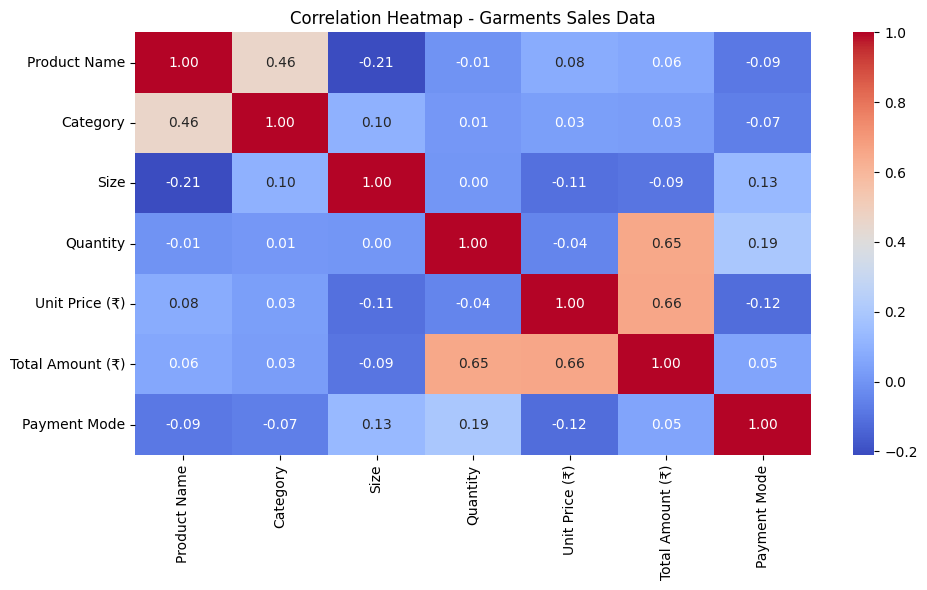

In [11]:
# Encode categorical columns to numeric values for correlation analysis
df_encoded = df.copy()
categorical_cols = ['Product Name', 'Category', 'Size', 'Payment Mode']
df_encoded[categorical_cols] = df_encoded[categorical_cols].astype('category').apply(lambda x: x.cat.codes)

# Compute correlation matrix
correlation_matrix = df_encoded.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Garments Sales Data')
plt.tight_layout()
plt.show()

we understood that as the quantity and unit price increases, total amount get increases. 

1) Which categories (Men/Women/Kids) contribute the most to sales volume and revenue?

Object `revenue` not found.


C:\Users\User\AppData\Local\Temp\ipykernel_2504\1307736768.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Category', ylabel='Total Amount (₹)'>

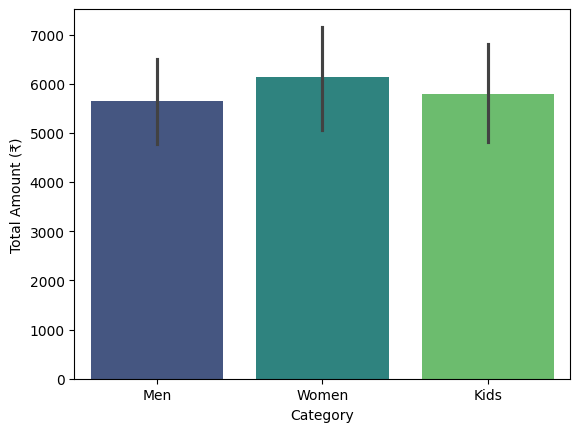

In [53]:
sns.barplot(x='Category', y='Total Amount (₹)', data=df, palette = "viridis")

as per the above graph output shows that all 3 categories impact positively in the total bill amount. 

2) What are the top 5 products by total sales and quantity sold?

   Product Name  Quantity  Total Amount (₹)
3         Jeans       105            216198
4    Kids Jeans        88            181739
8         Saree        61            129870
6         Kurti        63            122636
0  Casual Shirt        73            117412


C:\Users\User\AppData\Local\Temp\ipykernel_2504\421345171.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_products, x='Product Name', y='Total Amount (₹)', palette='viridis')


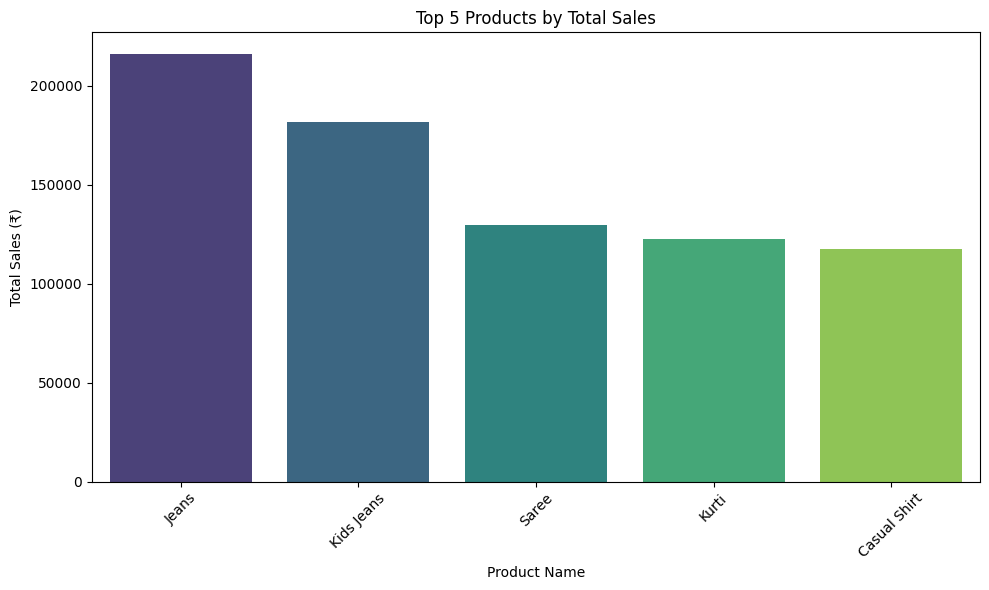

In [15]:


 # Groupby 'Product Name' and calculate total quantity and total sales
summary = df.groupby('Product Name').agg({
    'Quantity': 'sum',
    'Total Amount (₹)': 'sum'
}).reset_index()

# 2. Sort the grouped data by Total Sales
top_5_products = summary.sort_values(by='Total Amount (₹)', ascending=False).head(5)

# 3. Display the top 5 products
print(top_5_products)

# 4. Visualize it
plt.figure(figsize=(10,6))
sns.barplot(data=top_5_products, x='Product Name', y='Total Amount (₹)', palette='viridis')
plt.title('Top 5 Products by Total Sales')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Jeans and kids jeans are the major revenue sources and we should work on Kurti and Casual shirt to improve the sales 

3) Which sizes are most frequently sold per category?

   Category  Size  Quantity
6      Kids  Free        46
8      Kids     M        34
1      Kids    28        26
4      Kids    34        26
2      Kids    30        18
9      Kids     S        10
11     Kids   XXL        10
3      Kids    32         9
7      Kids     L         7
5      Kids    36         4
10     Kids    XL         4
0      Kids    28         3
20      Men     M        46
15      Men    34        30
21      Men     S        29
19      Men     L        27
12      Men    28        24
23      Men   XXL        19
18      Men  Free        18
16      Men    38        16
22      Men    XL        11
13      Men    30        10
14      Men    32         9
17      Men    40         3
28    Women  Free        67
26    Women    32        19
33    Women   XXL        18
31    Women     S        16
30    Women     M        15
29    Women     L        11
25    Women    30         8
24    Women    28         6
27    Women    34         3
32    Women    XL         3


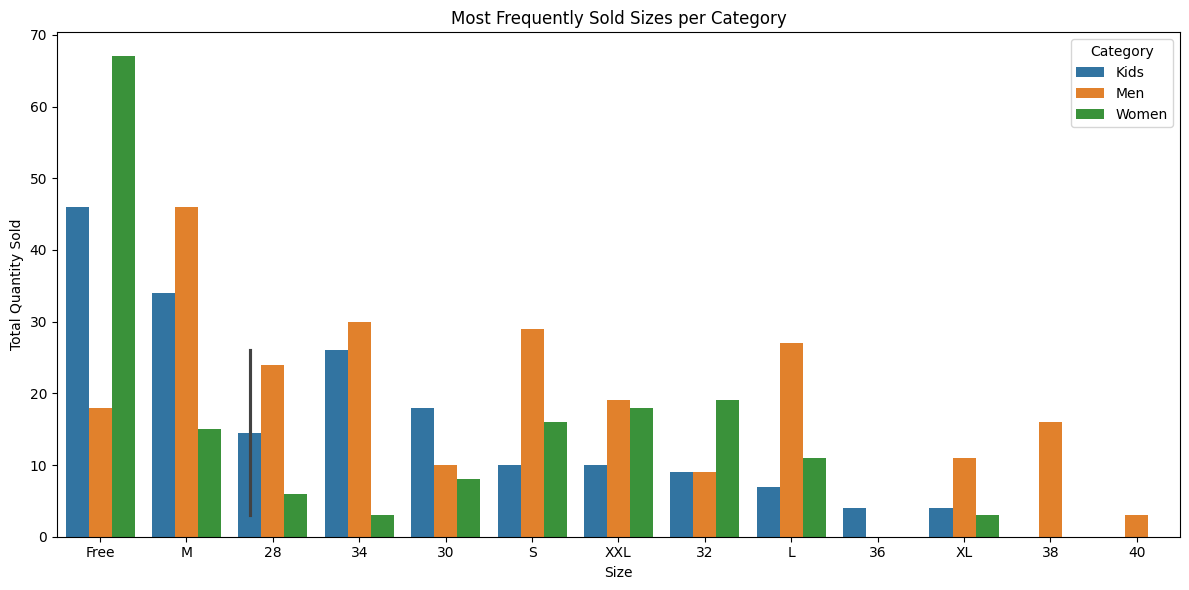

In [17]:


size_stats = df.groupby(['Category', 'Size'])['Quantity'].sum().reset_index()

# Sort to show the top-selling sizes per category
size_stats_sorted = size_stats.sort_values(by=['Category', 'Quantity'], ascending=[True, False])

# Display the result
print(size_stats_sorted)

# Optional: Plot the result
plt.figure(figsize=(12, 6))
sns.barplot(data=size_stats_sorted, x='Size', y='Quantity', hue='Category')
plt.title('Most Frequently Sold Sizes per Category')
plt.xlabel('Size')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

Good sales :
Kids and women with Free size shops more 
Men and kids with Medium size shops more. 

Bad sales:
Focus has to be given more towards 36 and 40 size for all the categories. 

4) What is the average selling price and quantity per product over time?

In [54]:


# Group by Date and Product Name to compute average metrics
avg_metrics = df.groupby(['Date', 'Product Name']).agg({
    'Unit Price (₹)': 'mean',
    'Quantity': 'mean'
}).reset_index()

# Rename columns
avg_metrics.rename(columns={
    'Unit Price (₹)': 'Avg_Unit_Price',
    'Quantity': 'Avg_Quantity'
}, inplace=True)


print(avg_metrics)

          Date  Product Name  Avg_Unit_Price  Avg_Quantity
0   2024-01-01  Formal Shirt           655.0           2.0
1   2024-01-02  Casual Shirt          2742.0           5.0
2   2024-01-03         Kurti           484.0           4.0
3   2024-01-04  Kids T-Shirt          1506.0           1.0
4   2024-01-05  Formal Shirt          1926.0           4.0
..         ...           ...             ...           ...
170 2024-03-30         Jeans          2300.0           3.0
171 2024-03-30      Leggings          1926.0           3.0
172 2024-03-30         Saree          1909.0           1.0
173 2024-03-31    Kids Jeans          3438.0           5.0
174 2024-03-31  Kids T-Shirt          1421.0           3.0

[175 rows x 4 columns]


5) Are there particular dates or days with higher customer purchases? (peak shopping days)

In [20]:
# Group by Date and calculate total revenue
daily_revenue = df.groupby('Date')['Total Amount (₹)'].sum().reset_index()

# Rename column for clarity
daily_revenue.rename(columns={'Total Amount (₹)': 'Total_Revenue'}, inplace=True)

# Filter for days with revenue > 10,000
peak_days = daily_revenue[daily_revenue['Total_Revenue'] > 10000]

# Sort by revenue descending and take top 10
top_10_peak_days = peak_days.sort_values(by='Total_Revenue', ascending=False).head(10)

# Display result
print(top_10_peak_days)

         Date  Total_Revenue
19 2024-01-22          68340
12 2024-01-13          38274
36 2024-02-09          37853
43 2024-02-16          35871
22 2024-01-25          34820
48 2024-02-21          34237
34 2024-02-07          33312
76 2024-03-26          31068
37 2024-02-10          28438
78 2024-03-29          28067


C:\Users\User\AppData\Local\Temp\ipykernel_2504\2675056983.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




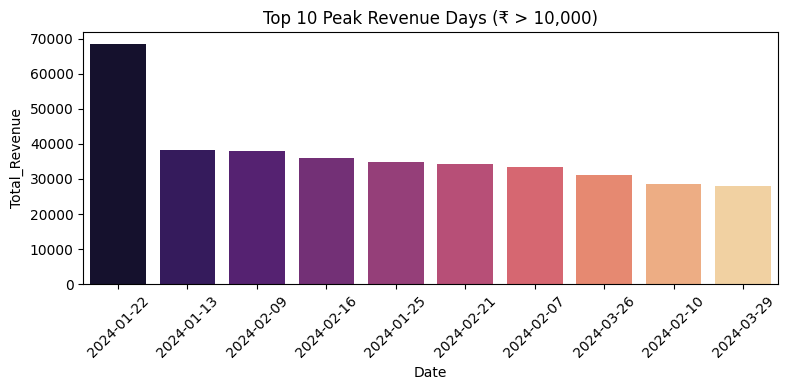

In [55]:
plt.figure(figsize=(8, 4))
sns.barplot(data=top_10_peak_days, x='Date', y='Total_Revenue', palette='magma')
plt.title('Top 10 Peak Revenue Days (₹ > 10,000)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This bar chart, "Top 10 Peak Revenue Days (₹ > 10,000)", highlights January 22, 2024, as the highest revenue day at nearly ₹70,000, 
significantly surpassing other top days which range from approximately ₹28,000 to ₹38,000. 
The remaining nine peak days are distributed between January, February, and March 2024, 
showing several strong sales days outside of the singular highest peak.

In [22]:
pip install sqlalchemy pandas openpyxl


Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
from sqlalchemy import create_engine

# we are creating this SQL import mode as we are solving few sql queries within the python notebook. 

In [24]:
# Create SQLite in-memory engine
engine = create_engine('sqlite://', echo=False)

# Load DataFrame to SQL
df.to_sql('garments', con=engine, index=False, if_exists='replace')

200

In [25]:
query = """
SELECT 
    Date, 
    SUM([Total Amount (₹)]) AS Total_Revenue
FROM garments
GROUP BY Date
HAVING Total_Revenue > 10000
ORDER BY Total_Revenue DESC
LIMIT 10;
"""

# Run the query
result_df = pd.read_sql(query, con=engine)

# Show result
print(result_df)


                         Date  Total_Revenue
0  2024-01-22 00:00:00.000000          68340
1  2024-01-13 00:00:00.000000          38274
2  2024-02-09 00:00:00.000000          37853
3  2024-02-16 00:00:00.000000          35871
4  2024-01-25 00:00:00.000000          34820
5  2024-02-21 00:00:00.000000          34237
6  2024-02-07 00:00:00.000000          33312
7  2024-03-26 00:00:00.000000          31068
8  2024-02-10 00:00:00.000000          28438
9  2024-03-29 00:00:00.000000          28067


# Pricing & Offer Strategy

6) Which products have high price but low volume (potential for discounting to attract)?


In [31]:
query =  """
SELECT 
    `Product Name`,
    ROUND(AVG(`Unit Price (₹)`)) AS Avg_Unit_Price,
    SUM(Quantity) AS Total_Quantity_Sold
FROM garments
GROUP BY `Product Name`
ORDER BY Avg_Unit_Price DESC, Total_Quantity_Sold ASC;
"""
# Run the query
result_df = pd.read_sql(query, con=engine)

# Show result
print(result_df)

   Product Name  Avg_Unit_Price  Total_Quantity_Sold
0         Saree          2202.0                   61
1         Frock          2165.0                   46
2    Kids Jeans          2058.0                   88
3      Leggings          2027.0                   42
4         Jeans          1981.0                  105
5         Kurti          1934.0                   63
6  Formal Shirt          1831.0                   64
7  Casual Shirt          1700.0                   73
8  Kids T-Shirt          1660.0                   63


Saree (₹2202, 61 units), Frock (₹2165, 46 units), and Leggings (₹2027, 42 units) are identified as products with high average unit prices but relatively low total quantities sold. These items present potential opportunities for strategic discounting to stimulate higher sales volumes.

7) What are the top-performing products with consistent repeat sales (don’t need discounts)?

In [32]:
query = """
SELECT 
    `Product Name`,
    COUNT(DISTINCT Date) AS Days_Sold,
    SUM(Quantity) AS Total_Quantity_Sold,
    ROUND(AVG(`Unit Price (₹)`), 2) AS Avg_Unit_Price
FROM garments
GROUP BY `Product Name`
HAVING Days_Sold > 5 AND Total_Quantity_Sold > 10
ORDER BY Total_Quantity_Sold DESC;
"""

# Run the query
result_df = pd.read_sql(query, con=engine)

# Show result
print(result_df)

   Product Name  Days_Sold  Total_Quantity_Sold  Avg_Unit_Price
0         Jeans         25                  105         1981.09
1    Kids Jeans         23                   88         2057.96
2  Casual Shirt         19                   73         1700.15
3  Formal Shirt         23                   64         1830.84
4         Kurti         18                   63         1934.30
5  Kids T-Shirt         20                   63         1659.71
6         Saree         17                   61         2202.11
7         Frock         16                   46         2165.12
8      Leggings         14                   42         2027.12


Jeans and Kids Jeans are top performers, with Jeans selling 105 units over 25 days and Kids Jeans selling 88 units over 23 days. Their high sales volume and consistent daily presence suggest strong demand without needing discounts.

# 🧾 Payment & Trust Metrics

8) What is the preferred payment mode (Cash, UPI, Card)? Does it differ by price or category?

In [37]:
query = """
SELECT 
    CASE 
        WHEN `Total Amount (₹)` < 1000 THEN 'Low(<1000)'
        WHEN `Total Amount (₹)` BETWEEN 1000 AND 5000 THEN 'Medium(btn 1000&5000)'
        ELSE 'High(>5000)'
    END AS Price_Segment,
    `Payment Mode`,
    COUNT(*) AS Transactions
FROM garments
GROUP BY Price_Segment, `Payment Mode`
ORDER BY Price_Segment, Transactions DESC;
"""

# Run the query
result_df = pd.read_sql(query, con=engine)

# Show result
print(result_df)

           Price_Segment Payment Mode  Transactions
0            High(>5000)         Cash            43
1            High(>5000)          UPI            30
2            High(>5000)         Card            26
3             Low(<1000)         Card             4
4             Low(<1000)          UPI             3
5             Low(<1000)         Cash             1
6  Medium(btn 1000&5000)         Cash            34
7  Medium(btn 1000&5000)         Card            31
8  Medium(btn 1000&5000)          UPI            28


Cash & UPI has been the preferred payment methods for the transaction. 

9) What is the average bill amount per transaction per category?

In [38]:
query = """
SELECT 
    Category,
    ROUND(AVG(`Total Amount (₹)`), 2) AS Avg_Bill_Per_Transaction
FROM garments
GROUP BY Category
ORDER BY Avg_Bill_Per_Transaction DESC;
"""

# Run the query
result_df = pd.read_sql(query, con=engine)

# Show result
print(result_df)

  Category  Avg_Bill_Per_Transaction
0    Women                   6133.98
1     Kids                   5787.70
2      Men                   5649.48


C:\Users\User\AppData\Local\Temp\ipykernel_2504\257890852.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




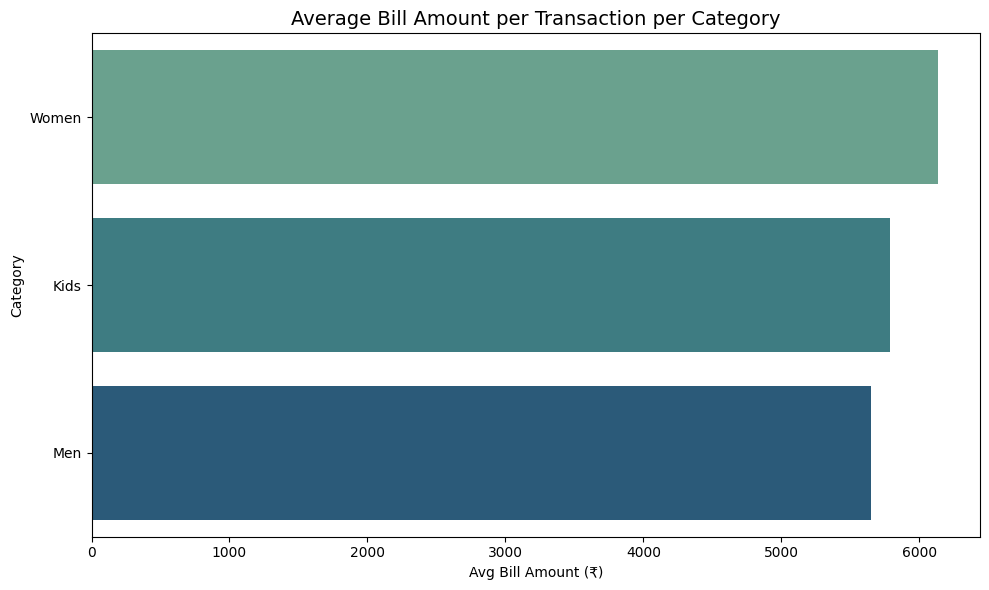

In [47]:
# Group by category and calculate average bill amount
avg_bill = df.groupby('Category')['Total Amount (₹)'].mean().reset_index()
avg_bill.columns = ['Category', 'Avg_Bill_Amount']
avg_bill.sort_values(by='Avg_Bill_Amount', ascending=False, inplace=True)

# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_bill, x='Avg_Bill_Amount', y='Category', palette='crest')
plt.title('Average Bill Amount per Transaction per Category', fontsize=14)
plt.xlabel('Avg Bill Amount (₹)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()


# 📆 Trend Monitoring

9) How has weekly sales trended since opening? Are we improving or declining?
   

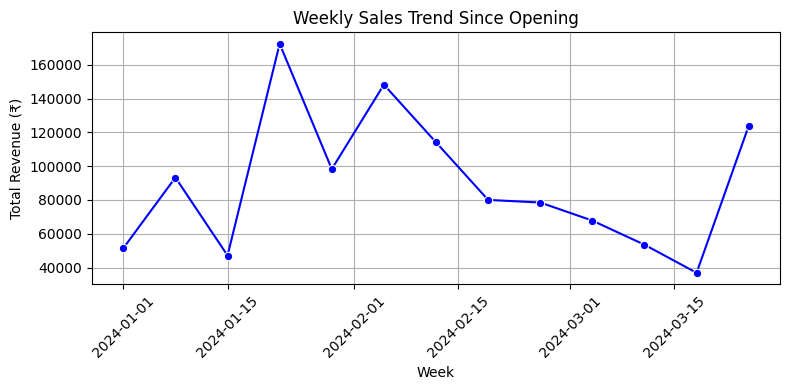

In [52]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create a 'Week' column (e.g., '2024-W10')
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by week and calculate total revenue
weekly_sales = df.groupby('Week')['Total Amount (₹)'].sum().reset_index()

# Plot weekly revenue trend
plt.figure(figsize=(8, 4))
sns.lineplot(data=weekly_sales, x='Week', y='Total Amount (₹)', marker='o', color='blue')
plt.title('Weekly Sales Trend Since Opening')
plt.xlabel('Week')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The weekly sales trend shows significant volatility, with peaks in mid-January (₹167,000) and early February (₹148,000), 
followed by a decline to a low of ₹38,000 in mid-March, before a strong recovery to ₹125,000 by late March.